In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use("ggplot")
mpl.rcParams.update({"font.size": 14})

import numpy as np

In [18]:
import pickle

In [27]:
import tensorflow as tf

In [30]:
import wispy.mscalev3

In [32]:
from tensorflow.keras.utils import get_custom_objects
import pugna.activations
get_custom_objects().update({'s2relu': pugna.activations.s2relu})

In [3]:
times = np.load("training_data/times.npy")
beta = np.load("training_data/beta.npy")
beta_sub = np.load("training_data_sub/beta.npy")

In [23]:
with open("pre_processing/times_scaler.pkl", 'rb') as file:
    times_scaler = pickle.load(file)

times_scaled = times_scaler.transform(times[:, np.newaxis])

In [24]:
preproc = dict(np.load('pre_processing/preprocessing_params.npz'))
preproc_sub = dict(np.load('pre_processing_sub/preprocessing_params.npz'))

In [25]:
preproc

{'alpha': array(16.15927932),
 'amp_21': array(0.03560372),
 'amp_22': array(0.39434565),
 'beta': array(0.57248811),
 'gamma': array(12.8373244),
 'phi_21': array(79.65597985),
 'phi_22': array(114.12893606)}

In [26]:
preproc_sub

{'alpha': array(16.15927932),
 'amp_21': array(0.03560372),
 'amp_22': array(0.39434565),
 'beta': array(0.16678908),
 'gamma': array(12.8373244),
 'phi_21': array(79.65597985),
 'phi_22': array(114.12893606)}

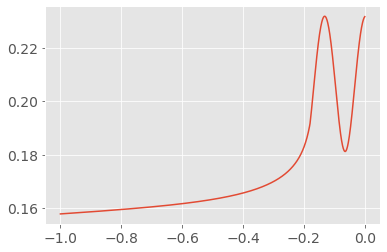

In [22]:
plt.figure()
# plt.plot(times, beta[0])
plt.plot(times_scaled, beta[0])

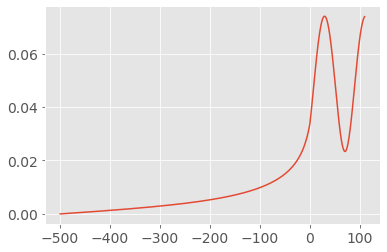

In [5]:
plt.figure()
plt.plot(times, beta_sub[0])

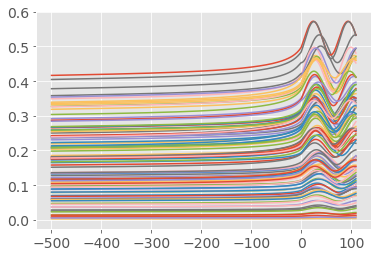

In [9]:
plt.figure()
for b in beta:
    plt.plot(times, b)

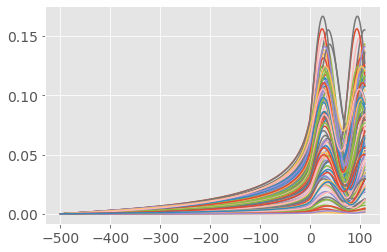

In [10]:
plt.figure()
for b in beta_sub:
    plt.plot(times, b)

In [37]:
!tail -n20 logs/*out

==> logs/fit_001.out <==
10/10 [==============================] - 2s 169ms/step - loss: 5.2796e-06 - val_loss: 2.7088e-05
Epoch 997/1000
10/10 [==============================] - 2s 166ms/step - loss: 4.7971e-06 - val_loss: 2.4606e-05
Epoch 998/1000
10/10 [==============================] - 2s 159ms/step - loss: 6.2004e-06 - val_loss: 2.5371e-05
Epoch 999/1000
10/10 [==============================] - 2s 166ms/step - loss: 4.6755e-06 - val_loss: 2.4494e-05
Epoch 1000/1000
10/10 [==============================] - 2s 172ms/step - loss: 4.4740e-06 - val_loss: 2.5414e-05
2021-09-03 10:41:41,407 - INFO - fit complete
2021-09-03 10:41:41,407 - INFO - The time cost: 0:19:38.180555
2021-09-03 10:41:41,407 - INFO - saving model using 'SavedModel' format
2021-09-03 10:41:46,224 - INFO - Assets written to: 001/model/assets
2021-09-03 10:41:46,324 - INFO - saving model using 'HDF5' format
2021-09-03 10:41:46,480 - INFO - plotting history
2021-09-03 10:41:47,990 - INFO - plotting lr
2021-09-03 10:41:4

In [33]:
model = tf.keras.models.load_model('001/model.h5',
                                   custom_objects={'ScaleLayer': wispy.mscalev3.ScaleLayer}
                                  )

In [35]:
!cat ../fit.py

#!/usr/bin/env python

"""
example
python fit.py -v --config-file config.toml (--force to continue training)

checkpoints:
https://www.tensorflow.org/guide/keras/train_and_evaluate#checkpointing_models
"""

import matplotlib.pyplot as plt
import matplotlib as mpl
import tensorflow as tf
import tensorflow_addons as tfa
import pickle
import random
import math
import numpy as np
import os
import glob
import sys
import argparse
import datetime
import subprocess
import wispy
import wispy.resnet
import wispy.logger
import wispy.utils
import wispy.callbacks
import wispy.model_utils
from compute_preprocessing import apply_pre_process_forward
from tomlkit import parse
from tensorflow.keras.utils import get_custom_objects
import pugna.activations
import pugna.layers
import pugna.models
import wispy.mscalev2
import wispy.mscalev3
import wispy.mscalev4
import wispy.mscalev4
import wispy.mscalev5

mpl.use("agg")

# from cycler import cycler
# from itertools import cycle

# mpl.rcParams.update(mpl.r